# Bitcoin Price Prediction Tutorial

### by Jake Catron
***

In this article I will be walking you through the process of using statistical analysis Logistics Regression, as well as cutting edge Machine Learning models such as Long Short-Term Memory (LSTM) to predict the price of the cryptocurrency Bitcoin (BTC).


## What is Bitcoin?

Bitcoin is the world's most popular and valuable cryptocurrency. Considering my grandfather once asked me about it, it is likely that you have heard of it as well. But, you may still not understand what it fundamentally is. 

Wikipedia provides the following definition: "Bitcoin is a digital assest designed to work as a medium of exhange that uses **cryptography** to control its creation and management, rather than relying on central authorities."

## Crypto-what??

Before we dive into Bitcoin, let's first explore cryptography to understand the basis. "Cryptography" comes from the Greek word *kryptos* (secret) and *graphein* (to write). So it is the practice of writing secret messages. How does one accomplish this secrecy in the modern world? We use **encryption algorithms** to convert plaintext into unitelligible nonsense known as a **hash**. Think about the food kind of hash, it is a jumbled mixture of many ingredients. In the same sense, a encrpytion hash is a jumbled mixture of letters and numbers. The goal of all encryption algorithms is to increase the **computational time** required to convert the hashes created back into plain text. This is the key takeaway here. Modern encrpytion algorithms create complex hashes that take *enormous* amounts of computational time and electricity to map back to the original value. 

## Soo, what is Bitcoin?

Well Bitcoin is founded on a principle called the **block-chain**. Think of every block as a page in a book. The page contains a bunch of information that we can use to make conclusions about the other pages in the book, and it also has a unique number. This number only appears once in the entire book! Let's call the number the **nonce** ("number only used once"). So each page in the book has information on it as well as its own nonce that leads to the next page directly after it. 

If we wanted, we could call a book a *page-chain* (see what I did there?). But the difference between the block-chain and the page-chain is that in a block-chain, each block's nonce (page number) is unknown at first. Imagine instead of our pages containing words and sentences in our natural language, someone used an encryption algorithm to mix up everything into a secret mess(age) of letters and numbers! Essentially this is what happens to each block in the block-chain. The creator of Bitcoin (Satoshi Nakamoto) encrypted the phrase "The Times 03/Jan/2009 Chancellor on brink of second bailout for banks" into the hash "000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f". This along with a **nonce** of 2083236893 and some other information such as the **signature** and **public key** formed the very first block in the block-chain of Bitcoin. 

Instead of simply turning the page, for a new block to be added to the chain someone with a lot of brains and computational power has to increment the nonce until it hashes to a hex number with a certain amount of leading 0 bits (look at the hash of the first block above). Once that threshold of 0 bits is reached, the **miner** of the block is awarded a certain amount of coin for their efforts. Then this newly formed block passes on its solved hash to everyone in the network, so they can start mining the next block into existence. 

## Bitcoin's Controlled Supply

Bitcoin was designed in a way that the difficulty of mining a new block (achieving the correct nonce) is adjusted every 2016 blocks mined. The difficulty is adjusted so that the rate of mining is roughly 6 blocks per hour. This adjustment is to account for advancements in computing power and speed. 

Also, the amount of coins awarded to a successful miner is cut in half every time 210,000 new blocks are mined and added to the chain. However once the 32 halvings occur, the suppy supply of Bitcoin is finite and unchangeable. Since the intial block awarded 50 Bitcoin, it follows that Bitcoin's *supply curve* will stop once reaching to a value juuust under 21 million.

***
**Note**: There are many other aspects of the block-chain which I did not touch on here, see Satoshi's paper in the references for further reading.





In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
import autokeras as ak

In [2]:
CMC_API_KEY = '50537acb-cc69-422a-be55-83ca8c4b7e91'

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/'



In [3]:
btc_1min_df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
btc_1min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [4]:

btc_1min_df = btc_1min_df.dropna(thresh=7).reset_index(drop=True)
btc_1min_df.info()
btc_1min_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613769 entries, 0 to 3613768
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 220.6 MB


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [5]:
btc_1min_df['Datetime'] = pd.to_datetime(btc_1min_df['Timestamp'], unit='s')
btc_1min_df


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00


<AxesSubplot:xlabel='Timestamp', ylabel='Weighted_Price'>

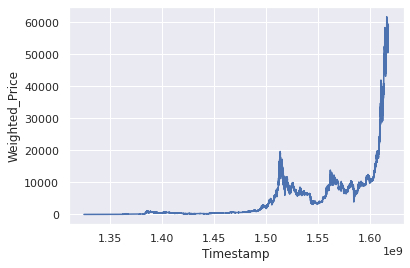

In [6]:
sns.set_theme()
sns.lineplot(data=btc_1min_df, x = 'Timestamp', y='Weighted_Price')

We will use an LSTM model because after reviewing countless academic papers, they seemed to commonly have the highest prediction accuracy, as well as the lowest measure of error. 

What is LSTM?

LSTM stands for Long Short-Term Memory. It is a type of Reccurent Neural Network (RNN). The thing with traditional neural nets is that they don't use the state/reasoning from an earlier layer to inform them about a later one. 

When analyzing an asset such as Bitcoin, we want to use the knowledge we have of previous timeframes to make a decision about the upcoming ones. If you want a more detailed understanding of LSTM model, I suggest [this article](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) by Chrisopher Olah.

  Thus we will be using an RNN. After reviewing the most recent academic literature on cryptocurrency price prediction (see [here](https://www.semanticscholar.org/paper/Bitcoin-price-prediction-using-machine-learning%3A-An-Chen-Li/cec3d533193d922b73b96e8556198f113e1de934), [here](https://www.sciencedirect.com/science/article/pii/S2405918821000027), and [here](https://arxiv.org/ftp/arxiv/papers/2102/2102.05448.pdf)) they all have the best results using LSTM with relatively high dimensions and frequency. 
 
The features I will be using are 

